In [1]:
import pandas as pd

excel_path = '/Users/afsaruddinmohammed/Downloads/Analysis of States.xlsx'
sheets = pd.read_excel(excel_path, sheet_name=None)
for name in sheets:
    print(f"{name}: {sheets[name].shape}")


OUTPUT: (52, 13)
REDFIN_MEDIAN_SALE_PRICE: (52, 159)
CENSUS_MHI_STATE: (47, 313)
CENSUS_POPULATION_STATE: (99, 209)
KEYS: (1030, 8)


In [4]:
output = sheets['OUTPUT']
output.describe()


,census_population,median_household_income,median_sale_price,house_affordability_ratio
count,5.200000e+01,52.000000,52.000000,52.000000
mean,6.502319e+06,77173.403846,393230.769231,5.028846
std,7.401875e+06,14810.725201,141318.388322,1.213702
min,5.840570e+05,25096.000000,138000.000000,3.100000
25%,1.916062e+06,69848.000000,282250.000000,4.100000
50%,4.379756e+06,75273.000000,374000.000000,4.900000
75%,7.526728e+06,88001.000000,483250.000000,5.825000
max,3.896519e+07,106287.000000,833000.000000,8.600000


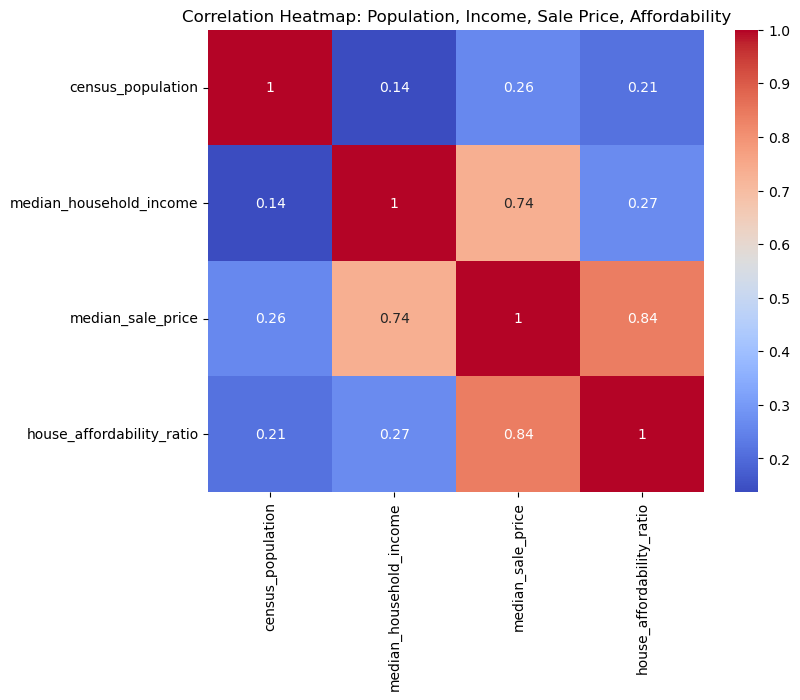

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(output[['census_population','median_household_income','median_sale_price','house_affordability_ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Population, Income, Sale Price, Affordability')
plt.show()


In [6]:
#Top 10 most affordable (lowest ratio)
output.nsmallest(10, 'house_affordability_ratio')[['key_row', 'house_affordability_ratio']]


,key_row,house_affordability_ratio
14,iowa,3.1
12,illinois,3.5
21,michigan,3.5
34,ohio,3.5
13,indiana,3.6
24,missouri,3.7
33,north_dakota,3.7
37,pennsylvania,3.7
35,oklahoma,3.8
15,kansas,3.9


In [7]:
# Top 10 by median_sale_price
output.nlargest(10, 'median_sale_price')[['key_row', 'median_sale_price']]

,key_row,median_sale_price
4,california,833000
10,hawaii,740000
46,washington,629000
20,massachusetts,614000
5,colorado,583000
31,new_york,577000
50,washington_dc,565000
43,utah,549000
25,montana,523000
29,new_jersey,521000


In [8]:
# Top 10 by population
output.nlargest(10, 'census_population')[['key_row', 'census_population']]


,key_row,census_population
4,california,38965193
42,texas,30503301
8,florida,22610726
31,new_york,19571216
37,pennsylvania,12961683
12,illinois,12549689
34,ohio,11785935
9,georgia,11029227
32,north_carolina,10835491
21,michigan,10037261


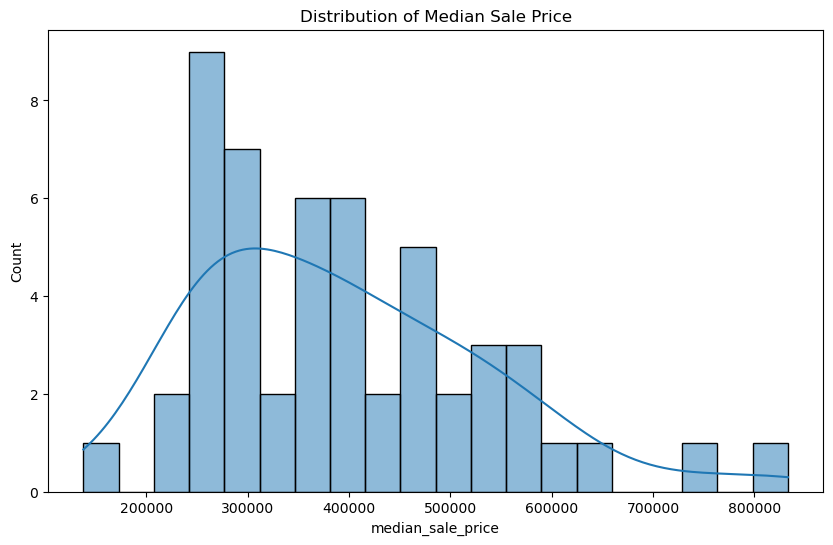

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(output['median_sale_price'], bins=20, kde=True)
plt.title('Distribution of Median Sale Price')
plt.show()

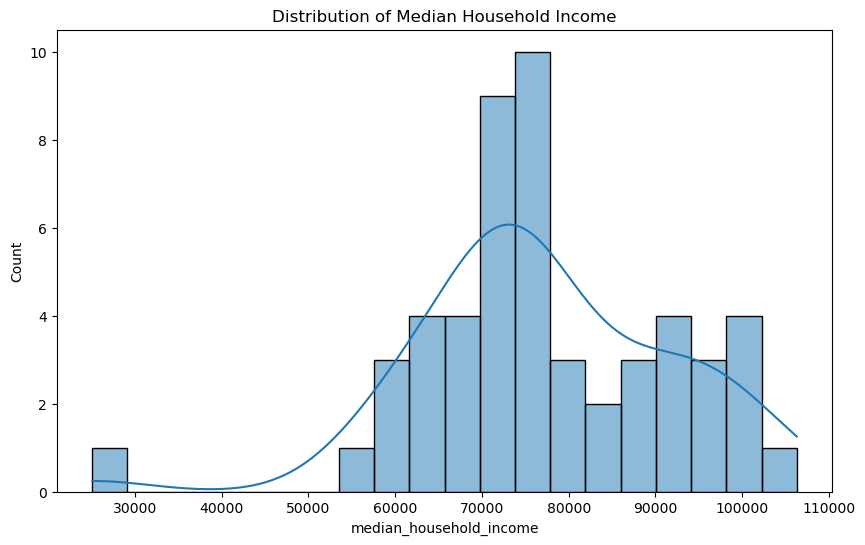

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(output['median_household_income'], bins=20, kde=True)
plt.title('Distribution of Median Household Income')
plt.show()

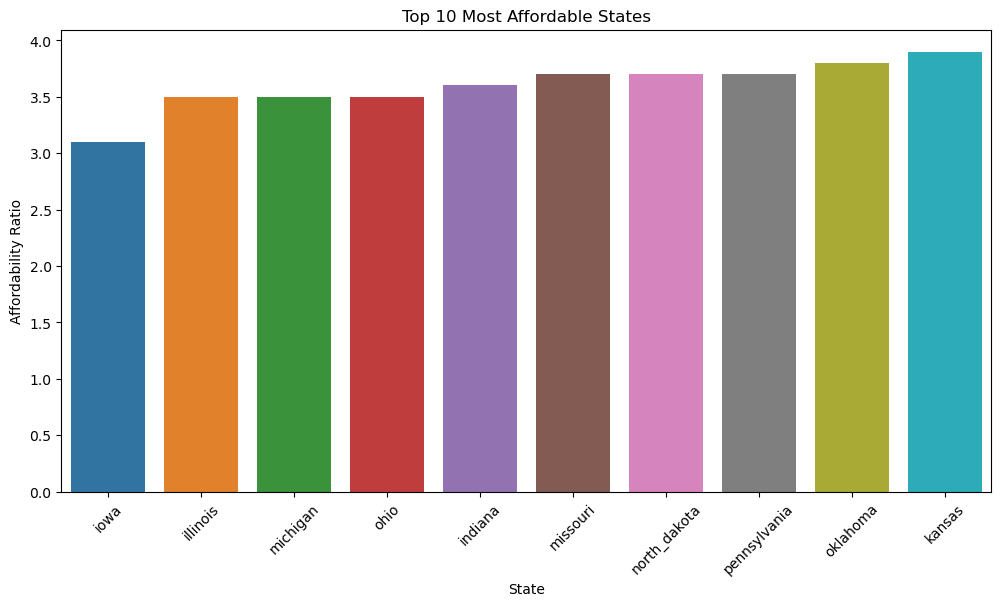

In [11]:
top_affordable = output.nsmallest(10, 'house_affordability_ratio')
plt.figure(figsize=(12,6))
sns.barplot(data=top_affordable, x='key_row', y='house_affordability_ratio')
plt.title('Top 10 Most Affordable States')
plt.ylabel('Affordability Ratio')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

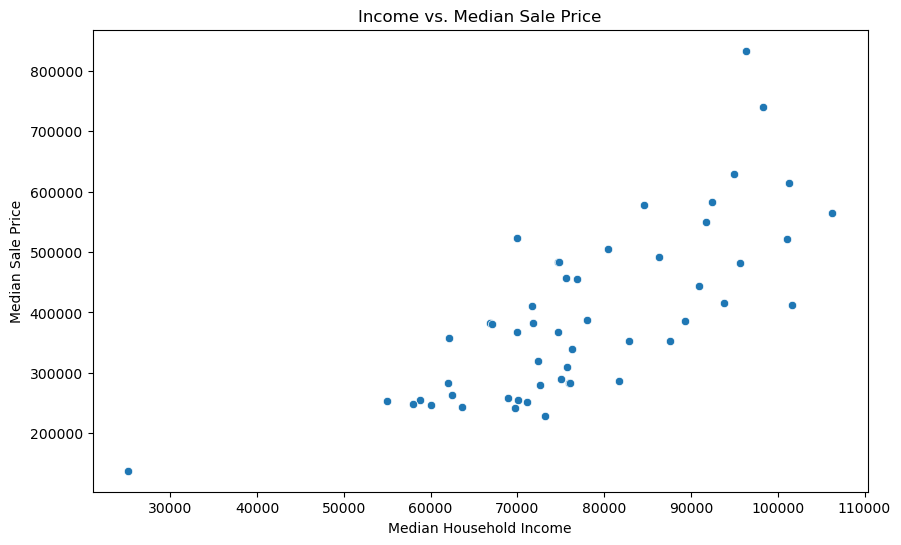

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=output, x='median_household_income', y='median_sale_price')
plt.title('Income vs. Median Sale Price')
plt.xlabel('Median Household Income')
plt.ylabel('Median Sale Price')
plt.show()


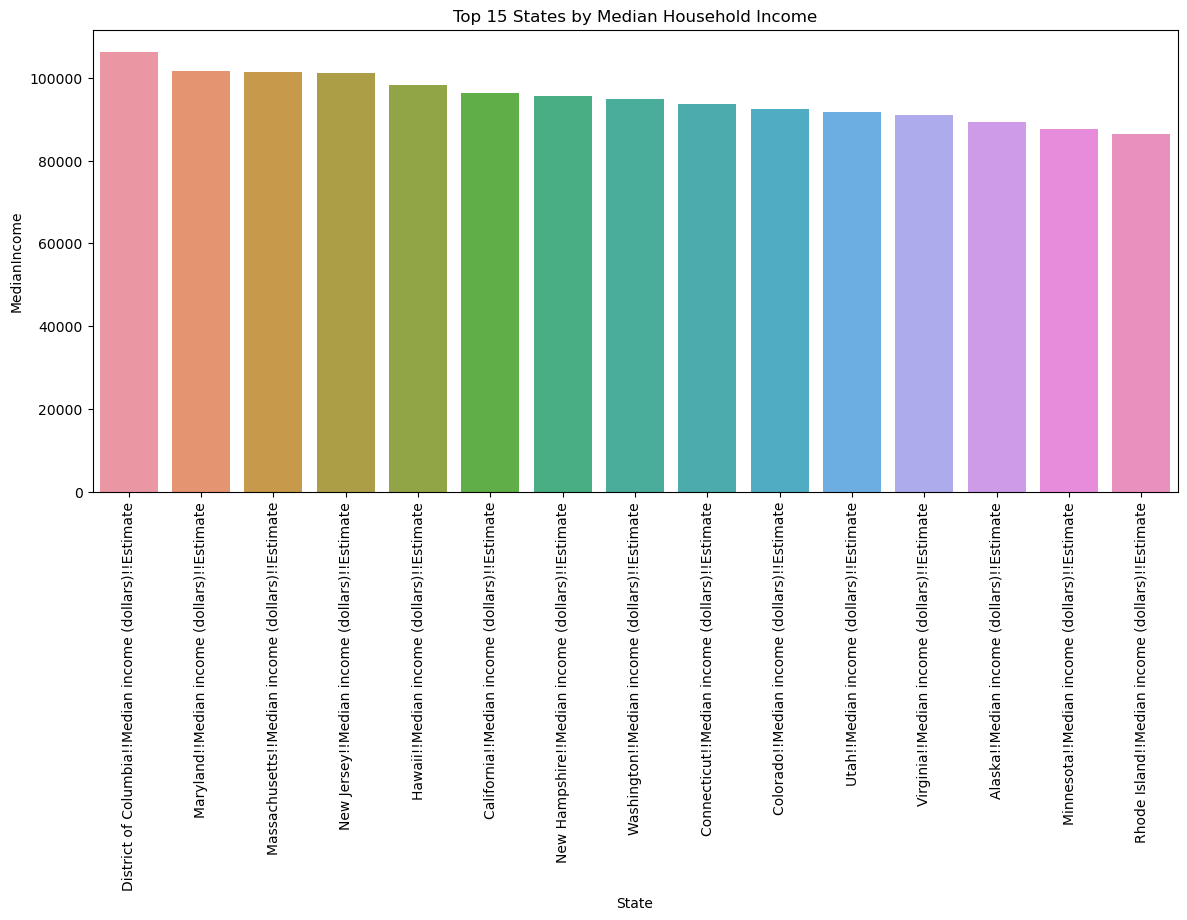

In [15]:
mhi = sheets['CENSUS_MHI_STATE']
households_row = mhi[mhi['Label (Grouping)'].astype(str).str.strip().str.lower() == 'households']
income_cols = [col for col in mhi.columns if 'Median income (dollars)!!Estimate' in col]
income_data = households_row[income_cols].T
income_data.columns = ['MedianIncome']
income_data = income_data.reset_index().rename(columns={'index':'State'})
income_data['MedianIncome'] = pd.to_numeric(income_data['MedianIncome'].astype(str).str.replace('$','').str.replace(',',''), errors='coerce')
income_data = income_data.dropna()
plt.figure(figsize=(14,6))
sns.barplot(data=income_data.sort_values('MedianIncome', ascending=False).head(15), x='State', y='MedianIncome')
plt.title('Top 15 States by Median Household Income')
plt.xticks(rotation=90)
plt.show()

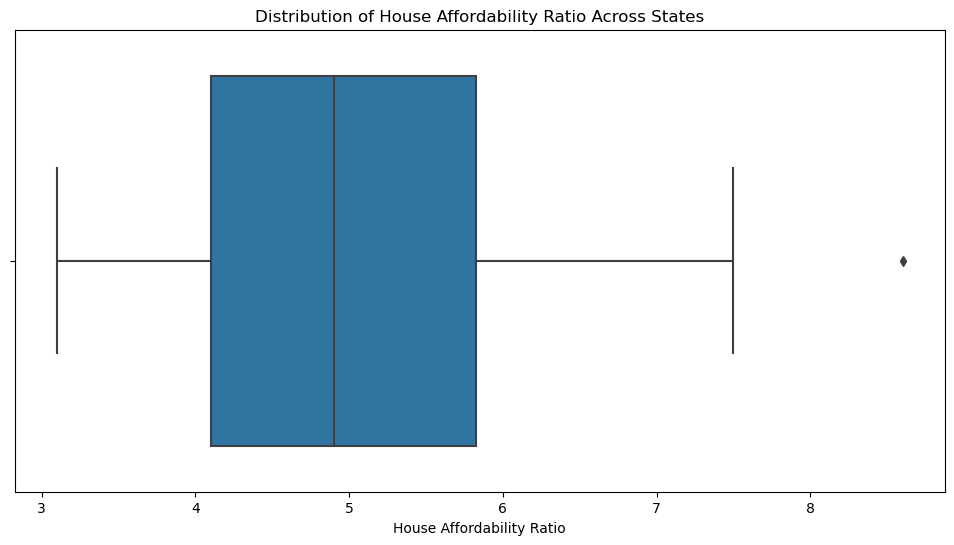

In [18]:
output = sheets['OUTPUT']
plt.figure(figsize=(12, 6))
sns.boxplot(x=output['house_affordability_ratio'])
plt.title('Distribution of House Affordability Ratio Across States')
plt.xlabel('House Affordability Ratio')
plt.show()